# Tutorial

I utilize a package called fast-arrow, which was developed by Weston Platter. It's a Robinhood API wrapper. It's great. Unfortunately, it can be a little finicky. If you have any problems, just message me and I will help figure it out. But basically, all we need acess to is options chain data. In the tutorial below, I will go through (in more depth) exactly what information we have, how it is structured. 
### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import getpass
import os
cdir =os.getcwd()
os.chdir('Fat_Tailed_Option_Model')
try:
    from Robinhood_Data_Datafetcher import Robinhood_Data
    from Fat_Tailed_Model import Fat_Tailed_Option_Model
    print('Packages Imported')
    os.chdir(cdir)
except:
    os.chdir(cdir)

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 un
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Packages Imported


In [2]:
print('RobinHood Username:')
username = input()
print('RobinHood PW:')
password = getpass.getpass()
data = Robinhood_Data(username,password) 

Username:
thaversang@gmail.com
········
Trys: 1.


### The Robinhood_Data Object
This object `data` allows us to fetch data for a given symbol. We have two methods available. One can fetch the data for a specific symbol on a specific expiration date. The method is called `data.get_options_robinhood`. The other, `data.get_all_options_robinhood` fetches *all* of the expirations. 

A quick note about a small quirk. The method `data.get_options_robinhood` returns just one pandas dataframe, containing the calls and puts together. This can be easily split into calls and puts by using a filter on the `type` column. The method `data.get_all_options_robinhood` returns three objects, which are calls, puts and the spot price. 

Further, the method `data.get_all_options_robinhood` is built on top of DASK, to hasten the datafetching process. Rather than fetch the data one after another in a loop, the data is fetched in parallel. 

In [3]:
option_df = data.get_options_robinhood('SPY',exp = '2019-09-20')
call_df,put_df = option_df.loc[option_df.type =='call'],option_df.loc[option_df.type =='put']
spot_ = call_df.spot_price.iat[0]

#### Prices

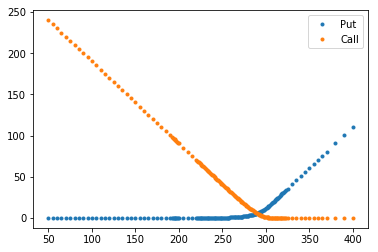

In [6]:
plt.plot(put_df.strike_price,put_df.adjusted_mark_price,'.')
plt.plot(call_df.strike_price,call_df.adjusted_mark_price,'.')
plt.legend(['Put','Call'])

#### Implied Vols

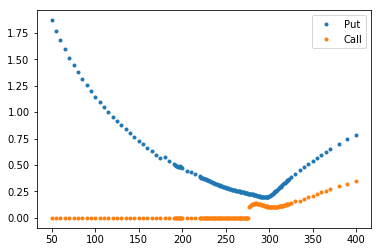

In [8]:
plt.plot(put_df.strike_price,put_df.implied_volatility,'.')
plt.plot(call_df.strike_price,call_df.implied_volatility,'.')
plt.legend(['Put','Call'])

#### Greeks

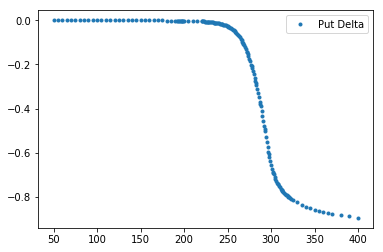

In [25]:
plt.plot(put_df.strike_price,put_df.delta,'.')
plt.legend(['Put Delta'])

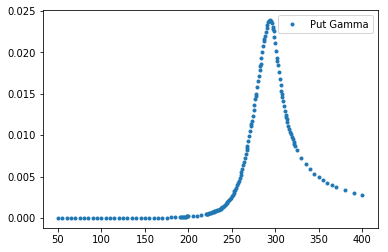

In [26]:
plt.plot(put_df.strike_price,put_df.gamma,'.')
plt.legend(['Put Gamma'])

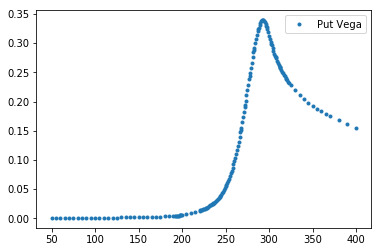

In [27]:
plt.plot(put_df.strike_price,put_df.vega,'.')
plt.legend(['Put Vega'])

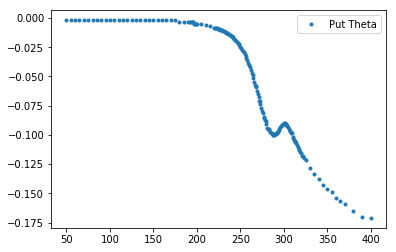

In [28]:
plt.plot(put_df.strike_price,put_df.theta,'.')
plt.legend(['Put Theta'])

# All Options

In [29]:
calls,puts,spots = data.get_all_options_robinhood('SPY')

#### We Can Look Across Expiry Now

In [38]:
g = calls.groupby('strike_price')
calendar_data = g.get_group(300)

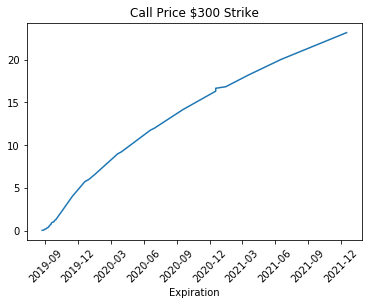

In [45]:
plt.plot(pd.to_datetime(calendar_data['expiration_date']),calendar_data.adjusted_mark_price)
plt.xlabel('Expiration')
plt.title('Call Price $300 Strike')
plt.xticks(rotation = 45);

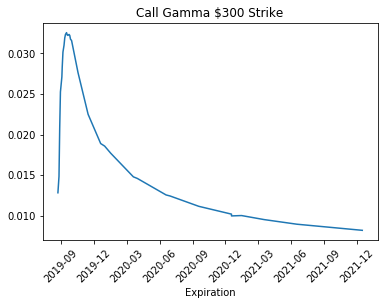

In [47]:
plt.plot(pd.to_datetime(calendar_data['expiration_date']),calendar_data.gamma)
plt.xlabel('Expiration')
plt.title('Call Gamma $300 Strike')
plt.xticks(rotation = 45);

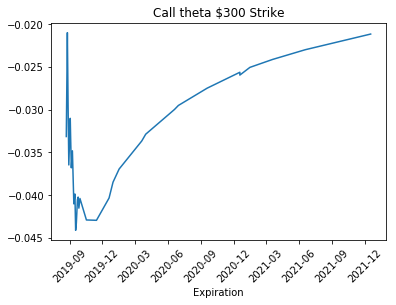

In [51]:
plt.plot(pd.to_datetime(calendar_data['expiration_date']),calendar_data.theta)
plt.xlabel('Expiration')
plt.title('Call theta $300 Strike')
plt.xticks(rotation = 45);